In [2]:
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('./../data/titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Распределение по возрасту, полу и выживаемости:

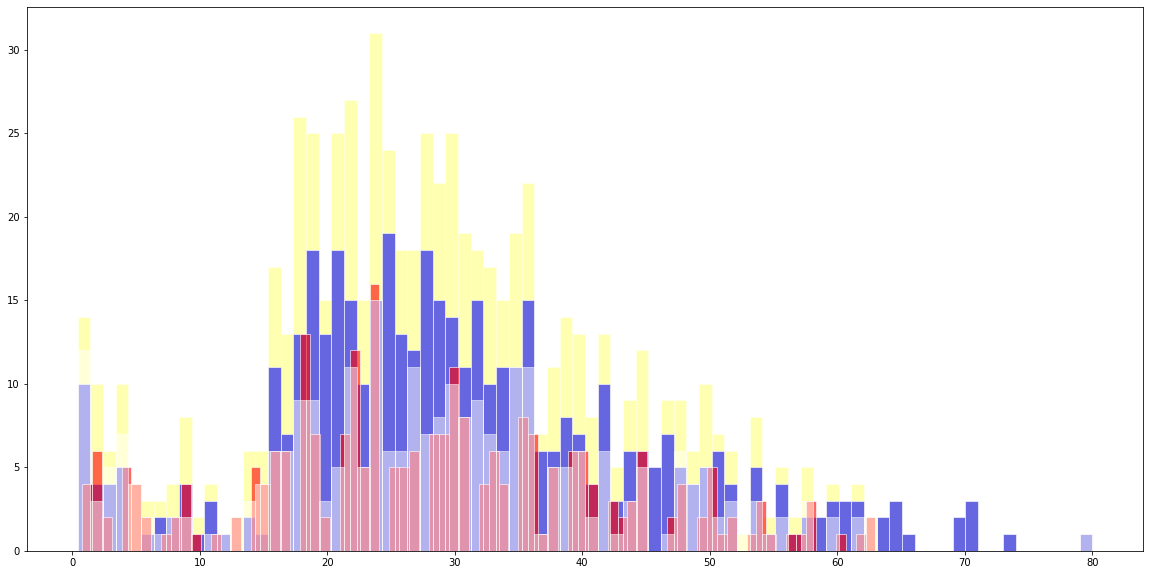

In [10]:
data['Age'].hist(color = 'yellow', alpha = 0.3, edgecolor = 'white', grid = False, bins = 80, figsize = (20, 10))
data[data['Sex'] == 'male']['Age'].hist(color = 'blue', alpha = 0.6, edgecolor = 'white', grid = False, bins = 80, figsize = (20, 10))
data[data['Sex'] == 'female']['Age'].hist(color = 'red', alpha = 0.6, edgecolor = 'white', grid = False, bins = 80, figsize = (20, 10))
data[data['Survived'] == 1 ]['Age'].hist(color = 'white', alpha = 0.5, edgecolor = 'white', grid = False, bins = 80, figsize = (20, 10))



import matplotlib.pyplot as plt
import math

#plt.scatter(9, 5, color = 'black', marker = 'o', linewidths = 5)

## Выживаемость по классам

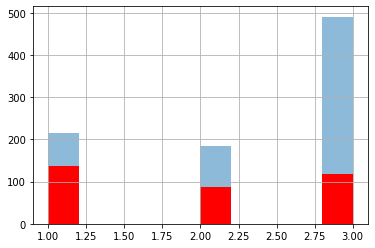

In [6]:
data['Pclass'].hist(alpha = 0.5)
data[data['Survived'] == 1]['Pclass'].hist(bins = 10, color = 'red')

data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['PassengerId'].nunique()
series = round(100 * data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['PassengerId'].nunique())
series

cl_af = 0.5

## Выживаемость по кабинам, но у многих нет, так что не совсем правильно

Cabin
E10        1
E121       2
F E69      1
F G63      1
F G73      2
F38        1
G6         4
N/A      479
Name: Cabin, dtype: int64

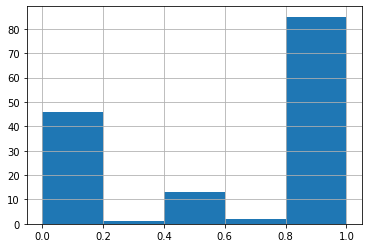

In [5]:
data.groupby(['Cabin'])['Survived'].sum()/data.groupby(['Cabin'])['PassengerId'].nunique()
series = data.groupby(['Cabin'])['Survived'].sum()/data.groupby(['Cabin'])['PassengerId'].nunique()
series
series.hist(bins = 5)

data.Cabin = data.Cabin.fillna('N/A')
data[data.Pclass == 3].groupby('Cabin')['Cabin'].count()

## Посадка классов по портам

In [6]:
data.groupby(['Embarked', 'Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Pclass                                                                
C        1                85        85    85   85   74     85     85      85   
         2                17        17    17   17   15     17     17      17   
         3                66        66    66   66   41     66     66      66   
Q        1                 2         2     2    2    2      2      2       2   
         2                 3         3     3    3    2      3      3       3   
         3                72        72    72   72   24     72     72      72   
S        1               127       127   127  127  108    127    127     127   
         2               164       164   164  164  156    164    164     164   
         3               353       353   353  353  290    353    353     353   

                 Fare  Cabin  
Embarked Pclass               
C        1         85     85  
         2         17     17  
         3         66     66  
Q        1          2      2  
         2          3      3  
         3         72     72  
S        1        127    127  
         2        164    164  
         3        353    353

## Распределение возрастов по классам

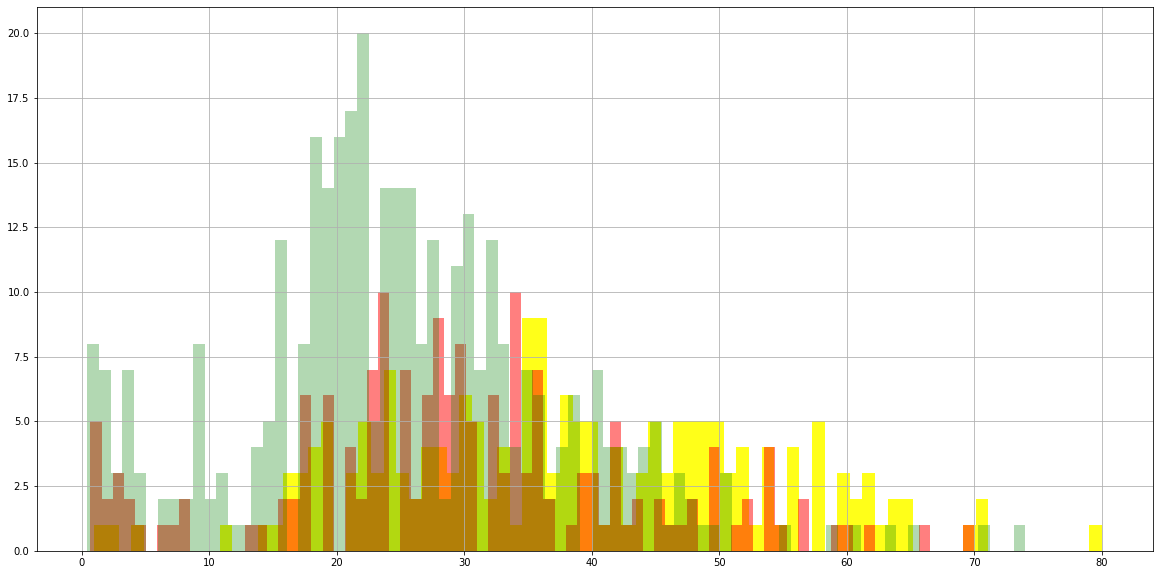

In [28]:
data[data['Pclass'] == 1]['Age'].hist(color = 'yellow', alpha = 0.9, bins = 80, figsize = (20, 10))
data[data['Pclass'] == 2]['Age'].hist(color = 'red', alpha = 0.5, bins = 80)
data[data['Pclass'] == 3]['Age'].hist(color = 'green', alpha = 0.3, bins = 80)

То же самое, но короче код

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

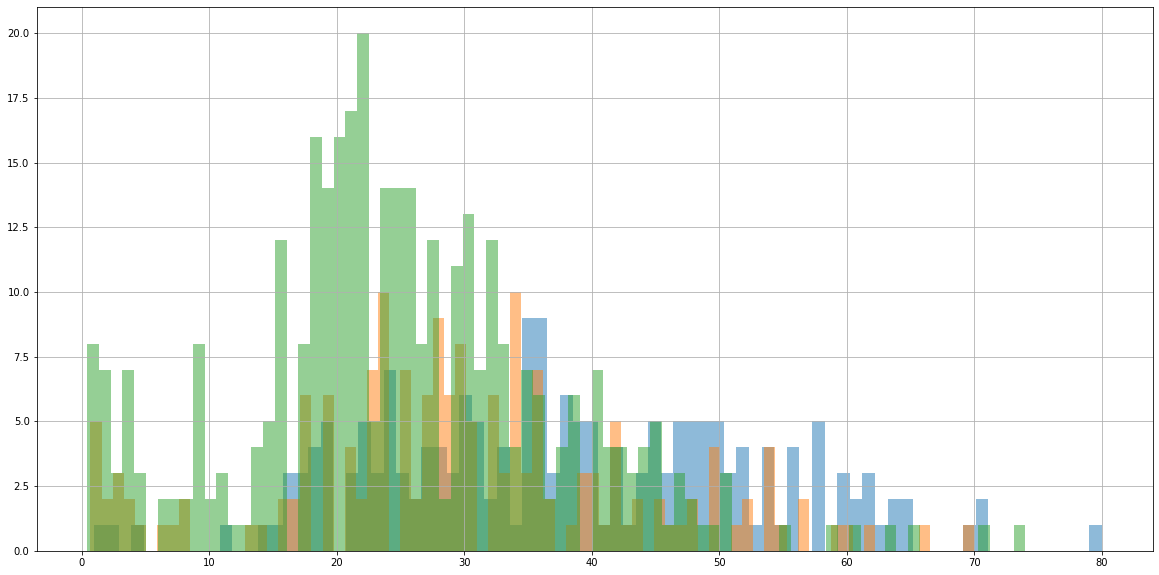

In [8]:
data.groupby(['Pclass'])['Age'].hist(figsize = (20, 10), alpha = 0.5, bins = 80)

Средний возраст по классам

In [9]:
data.groupby(['Pclass'])['Age'].mean()
data.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

## Исследование по родственникам

In [10]:
data['Family'] = data['SibSp'] + data['Parch']

In [11]:
data.groupby(['Pclass'])['Family'].mean()

Pclass
1    0.773148
2    0.782609
3    1.008147
Name: Family, dtype: float64

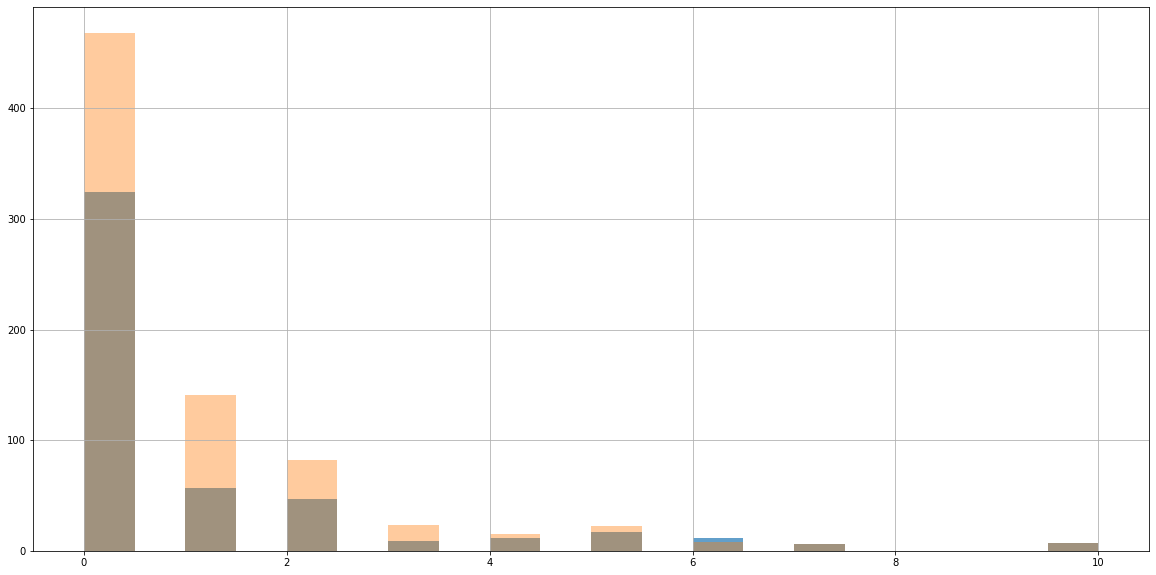

In [12]:
data[data.Pclass == 3]['Family'].hist(figsize = (20, 10), alpha = 0.7, bins = 20)
data[(data.Pclass == 3) & data.Survived == 0]['Family'].hist(figsize = (20, 10), alpha = 0.4, bins = 20)

In [13]:
series = data[data.Pclass == 3].groupby(['Family'])['Survived'].sum()/data[data.Pclass == 3].groupby(['Family'])['Survived'].count()

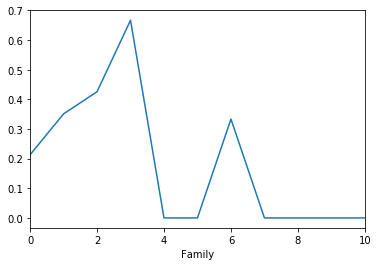

In [14]:
series.plot()

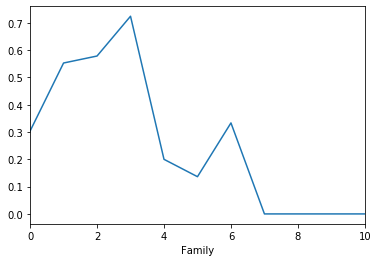

In [15]:
series = data.groupby(['Family'])['Survived'].sum()/data.groupby(['Family'])['Survived'].count()
series.plot()

## Еще какая-нибудь зависимость

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N/A,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,N/A,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


## Зависимость выживаемости от цены

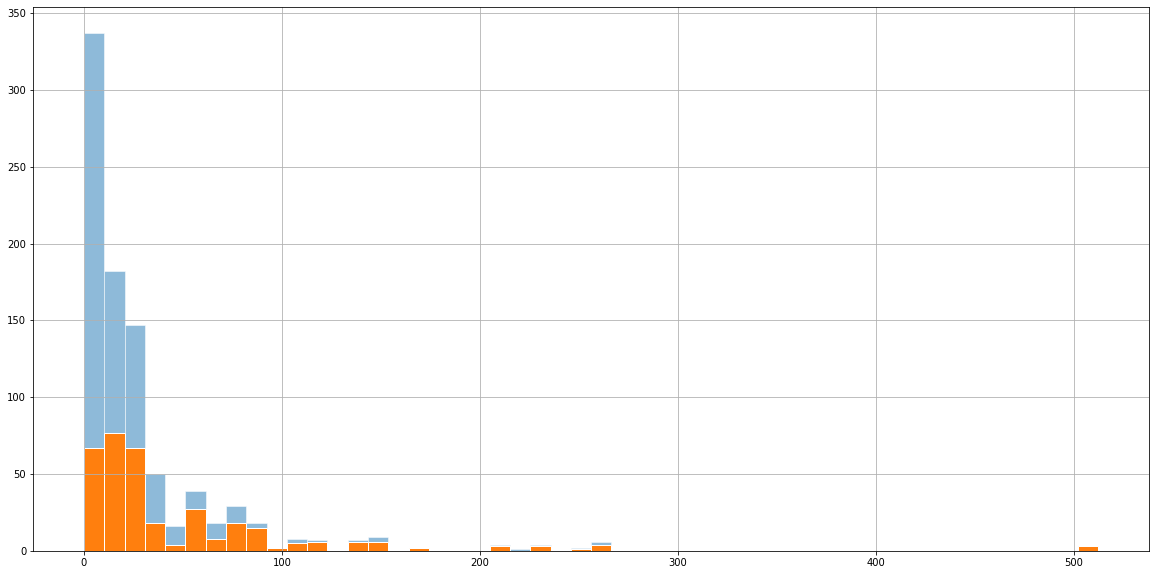

In [29]:
data['Fare'].hist(figsize = (20, 10), alpha = 0.5, bins = 50, edgecolor = 'white')
data[data['Survived'] == 1]['Fare'].hist(bins = 50, edgecolor = 'white')

### В процентах выживания от цены (дописать)

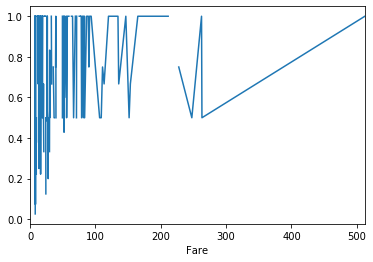

In [40]:
series = data[data.Survived == 1].groupby(['Fare'])['Survived'].sum()/data.groupby(['Fare'])['PassengerId'].nunique()
series.plot()

### Цена и класс связаны почти напрямую, поэтому да

# А теперь основная задача: предсказать умрет чувак или нет по его данным (потом)

мб надо типа сделать вклад по процентам в итоговое 1 или 0, как бы коэффициент и сам процент, потом суммировать

## Сильнее всего влияет класс и цена (в первом классе (самом дорогом) относительно больше всего выживает), возраст (лучше быть помоложе, аля лет 20-25), семья (сам и 3 родственника оптимально)